In [5]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are missing from the target environment:
  - nodejs==11
  - scikit-learn==0.21
  - tensorflow==1.13




In [14]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
## New Delhi
df_NDLS = df_india[df_india['City'] == 'New Delhi']

df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  Average Cost for two  \
0                       Cuisine Varies                   500   
1                            Fast Food                   350   
2   North Indian, Seafood, Continental                  1500   
3           South Indian, North Indian                   500   
4  South Indian, North Indian, Chinese                   500   

             Currency Has Table booking Has Online delivery Is delivering now  \
0  Indian Rupees(Rs.)                No                  No                No   
1  Indian Rupees(Rs.)                No                 Yes                No   
2  Indian Rupees(Rs.)               Yes                 Yes                No   
3  Indian Rupees(Rs.)                No                  No                No   
4  Indian Rupees(Rs.)                No                 Yes                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            2               0.0        White   
1                   No            1               3.2       Orange   
2                   No            3               3.4       Orange   
3                   No            2               2.6       Orange   
4                   No            2               3.4       Orange   

  Rating text  Votes  
0   Not rated      2  
1     Average     46  
2     Average     45  
3     Average     11  
4     Average    238

In [15]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [16]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [17]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [19]:
ND = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(ND)  

ND

In [20]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

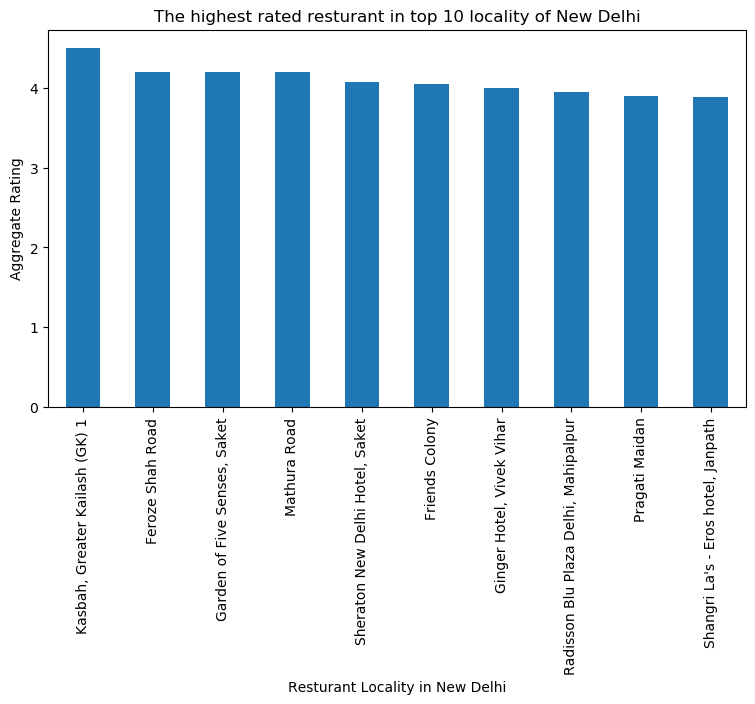

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [23]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [24]:
df_final.shape

(240, 8)

In [25]:
CLIENT_ID = 'UM4KUQOANLE54FNHAZNTFC0KGJTF042JN35HWFOHM1XIQRFE' # Foursquare ID
CLIENT_SECRET = '1TFWLNRUDNOZJZE0ZFNQMVWHONAX3KXBJTAOIROJSD55TVZB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + 'XXXXXXXXXXXXXXXXXXXXXXX')
print('CLIENT_SECRET:' + 'XXXXXXXXXXXXXXXXXXXX')

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXX


In [29]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [31]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [32]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     7   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     4   
Andaz Delhi, Aerocity                                          25   
Ansal Plaza Mall, Khel Gaon Marg                                6   
Asaf Ali Road                                                   9   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             5   
Barakhamba Road                                                13   
Basant Lok Market, Vasant Vihar                                27   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          10   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    5   
Chander Nagar                                                   2   
Chandni Chowk                                                  19   
Chawri Bazar                                                    7   
Chhatarpur                                                      6   
Chittaranjan Park                                               5   
City Centre Mall, Rohini                                        8   
City Square Mall, Rajouri Garden                               23   
Civil Lines                                                     5   
Community Centre, New Friends Colony                           23   
Connaught Place                                                66   
Crescent Square Mall, Rohini                                    4   
Cross River Mall, Karkardooma                                   4   
Crowne Plaza Hotel, Rohini                                      7   
Crowne Plaza, Mayur Vihar Phase 1                              13   
D Mall, Netaji Subhash Place                                   17   
DDA Market, Kalu Sarai, Hauz Khas                               5   
DLF City Centre Mall, Shalimar Bagh                             5   
DLF Emporio Mall, Vasant Kunj                                  46   
DLF Place Mall, Saket                                          68   
DLF Promenade Mall, Vasant Kunj                                46   
DLF South Square, Sarojini Nagar                               13   
Daryaganj                                                      13   
Defence Colony                                                 18   
Delhi University-GTB Nagar                                     10   
Dilli Haat, INA                                                 5   
Dilshad Garden                                                  4   
District Centre, Janakpuri                                     13   
Dr. Zakir Hussain Marg                                         12   
East Patel Nagar                                               14   
East of Kailash                                                 8   
Epicuria Food Mall, Nehru Place                                31   
Eros Hotel, Nehru Place                                        27   
Essex Farms                                                     4   
Feroze Shah Road                                                1   
Friends Colony                                

In [33]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0                    0       0            0           0                    0   
1                    0       0            0           0                    0   
2                    0       0            0           0                    0   
3                    0       0            0           0                    0   
4                    0       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  BBQ Joint  \
0                 0                   0                      0          0   
1                 0                   0                      0          0   
2                 0                   0                      0          0   
3                 0                   0                      0          0   
4                 0                   0                      0          0   

   Bagel Shop  Bakery  Bank  Bar  Basketball Court  Bed & Breakfast  \
0           0       0     0    0                 0                0   
1           0       0     0    0                 0                0   
2           0       0     0    0                 0                0   
3           0       0     0    0                 0                0   
4           0       0     0    0                 0                0   

   Beer Garden  Bengali Restaurant  Bistro  Bookstore  Boutique  \
0            0                   0       0          0         0   
1            0                   0       0          0         0   
2            0                   0       0          0         0   
3            0                   0       0          0         0   
4            0                   0       0          0         0   

   Breakfast Spot  Bridal Shop  Buffet  Burger Joint  Burmese Restaurant  \
0               0            0       0             0                   0   
1               0            0       0             0                   0   
2               0            0       0             0                   0   
3               0            0       0             0                   0   
4               0            0       0             0                   0   

   Burrito Place  Bus Station  Business Center  Cafeteria  Café  Campground  \
0              0            0                0          0     0           0   
1              0            0                0          0     0           0   
2              0            0                0          0     0           0   
3              0            0                0          0     0           0   
4              0            0                0          0     0           0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Clothing Store  \
0            0                   0               0               0   
1            0                   0               0               0   
2            0                   0               0               0   
3            0                   0               0               0   
4            0                   1               0           

In [34]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
30             Community Centre, New Friends Colony  0.000000   
31                                  Connaught Place  0.000000   
32                     Crescent Square Mall, Rohini  0.000000   
33                    Cross River Mall, Karkardooma  0.000000   
34                       Crowne Plaza Hotel, Rohini  0.000000   
35                Crowne Plaza, Mayur Vihar Phase 1  0.000000   
36                     D Mall, Netaji Subhash Place  0.000000   
37                DDA Market, Kalu Sarai, Hauz Khas  0.000000   
38              DLF City Centre Mall, Shalimar Bagh  0.000000   
39                    DLF Emporio Mall, Vasant Kunj  0.000000   
40                            DLF Place Mall, Saket  0.000000   
41                  DLF Promenade Mall, Vasant Kunj  0.000000   
42                 DLF South Square, Sarojini Nagar  0.000000   
43                                        Daryaganj  0.000000   
44                                   Defence Colony  0.000000   
45                       Delhi University-GTB Nagar  0.000000   
46                                  Dilli Haat, INA  0.000000   
47                                   Dilshad Garden  0.000000   
48                       District Centre, Janakpuri  0.000000   
49                           Dr. Zakir Hussain Marg  0.000000   
50                                 East Patel Nagar  0.000000   
51                                  East of Kailash  0.000000   
52                  Epicuria Food Mall, Nehru Place  0.000000   
53                          Eros Hotel, Nehru Place  0.000000   
54                                      Essex Farms  0.000000   
55                                 Feroze Shah Road  0.000000   
56                                   Friends Colony  0.000000   
57                                        GTB Nagar  0.000000   
58                     Garden of Five Senses, Saket  0.000000   
59                                     Geeta Colony  0.000000   
60                        Ginger Hotel, Vivek Vihar  0.000000   
61           

In [35]:
New_Delhi_grouped.shape

(236, 210)

In [36]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                          Market  0.11
3  Multicuisine Indian Restaurant  0.11
4              Chinese Restaurant  0.11


----Adchini----
                           venue  freq
0              Indian Restaurant  0.33
1                           Café  0.33
2                            Pub  0.17
3               Parsi Restaurant  0.17
4  Paper / Office Supplies Store  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1        Pizza Place   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1          Coffee Shop  0.14
2       Airport Lounge  0.14
3     Airport Terminal  0.14
4  Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0          Mu

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality  \
0                          ARSS Mall, Paschim Vihar   
1                                           Adchini   
2                     Aditya Mega Mall, Karkardooma   
3                                          Aerocity   
4                     Aggarwal City Mall, Pitampura   
5                       Aggarwal City Plaza, Rohini   
6                                         Alaknanda   
7                        Ambience Mall, Vasant Kunj   
8                                         Anand Lok   
9                                       Anand Vihar   
10                            Andaz Delhi, Aerocity   
11                 Ansal Plaza Mall, Khel Gaon Marg   
12                                    Asaf Ali Road   
13                              Ashok Vihar Phase 1   
14                              Ashok Vihar Phase 2   
15                              Ashok Vihar Phase 3   
16                                  Barakhamba Road   
17                  Basant Lok Market, Vasant Vihar   
18                    Bellagio, Ashok Vihar Phase 2   
19            Best Western Taurus Hotel, Mahipalpur   
20                               Bhikaji Cama Place   
21                                     Chanakyapuri   
22                                    Chander Nagar   
23                                    Chandni Chowk   
24                                     Chawri Bazar   
25                                       Chhatarpur   
26                                Chittaranjan Park   
27                         City Centre Mall, Rohini   
28                 City Square Mall, Rajouri Garden   
29                                      Civil Lines   
30             Community Centre, New Friends Colony   
31                                  Connaught Place   
32                     Crescent Square Mall, Rohini   
33                    Cross River Mall, Karkardooma   
34                       Crowne Plaza Hotel, Rohini   
35                Crowne Plaza, Mayur Vihar Phase 1   
36                     D Mall, Netaji Subhash Place   
37                DDA Market, Kalu Sarai, Hauz Khas   
38              DLF City Centre Mall, Shalimar Bagh   
39                    DLF Emporio Mall, Vasant Kunj   
40                            DLF Place Mall, Saket   
41                  DLF Promenade Mall, Vasant Kunj   
42                 DLF South Square, Sarojini Nagar   
43                                        Daryaganj   
44                                   Defence Colony   
45                       Delhi University-GTB Nagar   
46                                  Dilli Haat, INA   
47                                   Dilshad Garden   
48                       District Centre, Janakpuri   
49                           Dr. Zakir Hussain Marg   
50                                 East Patel Nagar   
51                                  East of Kailash   
52                  Epicuria Food Mall, Nehru Place   
53                          Eros Hotel, Nehru Place   
54                                      Essex Farms   
55                                 Feroze Shah Road   
56                                   Friends Colony   
57                                        GTB Nagar   
58                     Garden of Five Senses, Saket   
59                                     Geeta Colony   
60                        Ginger Hotel, Vivek Vihar   
61                        Gourmet Hub, Pashim Vihar   
62                           Greater Kailash (GK) 1   
63                           Greater Kailash (GK) 2   
64                           Greater Kailash (GK) 3   
65                                       Green Park   
66                                  Gujranwala Town   
67                                        Hauz Khas   
68                                Hauz Khas Village   
69                            Holiday Inn, Aerocity   
70                         Holiday Inn, Mayur Vihar   
71                        Hotel Broadway, Daryaganj   
72                       Hot

In [39]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(236,)

In [41]:
# add clustering labels
New_Delhi_merged = df_final.head(236)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               2   
1  Average, Good, Poor, Very Good         1560               2   
2                   Average, Good          434               2   
3                         Average           59               1   
4                         Average          126               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                  Café                   Pub   
2           Pizza Place         Shopping Mall     Indian Restaurant   
3                 Hotel        Airport Lounge      Airport Terminal   
4      Department Store           Pizza Place     Indian Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place           Coffee Shop    Chinese Restaurant   
1      Parsi Restaurant           Yoga Studio           Flea Market   
2             Multiplex                 Hotel                  Café   
3   Rental Car Location           Coffee Shop  Fast Food Restaurant   
4             Multiplex           Yoga Studio                  Food   

  7th Most Common Venue           8th Most Common Venue  \
0        Sandwich Place  Multicuisine Indian Restaurant   
1           Gaming Cafe          Furniture / Home Store   
2           Yoga Studio                            Food   
3                  Food                          Garden   
4                Garden                     Gaming Cafe   

    9th Most Common Venue  10th Most Common Venue  
0              Hotel Pool       Fish & Chips Shop  
1      Frozen Yogurt Shop     Fried Chicken Joint  
2             Gaming Cafe  Furniture / Home Store  
3             Gaming Cafe  Furniture / Home Store  
4  Furniture / Home Store      Frozen Yogurt Shop

In [42]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
5    28.700516    3.040000                        Average, Good, Poor   
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
11   28.562580    3.750000                   Average, Good, Very Good   
14   28.693969    3.378571                              Average, Good   
15   28.691136    3.390909                   Average, Good, Very Good   
16   28.630440    3.208333                        Average, Good, Poor   
17   28.557846    3.220000                        Average, Good, Poor   
18   28.696302    3.300000                              Average, Good   
20   28.568193    2.755556                              Average, Poor   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
26   28.538688    3.130303                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
48   28.630149    2.950000                        Average, Good, Poor   
50   28.645084    3.235000             Average, Good, Poor, Very Good   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
57   28.699837    3.376471                   Average, Good, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
67   28.554545    3.251786        Average, Excellent, Good, Very Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
73   28.643036    3.000000                                    Average   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
80   28.611614    3.366667                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
87   28.582031    3.117143             Average, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
90   28.642755    3.450000                              Average, Good   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
94   28.538153    3.117143                        Average, Good, Poor

In [44]:
## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
3    28.553077    3.200000                                    Average   
10   28.554807    3.000000                                    Average   
12   28.641698    3.050000                                    Average   
19   28.548827    2.700000                                    Average   
25   28.495624    2.700000                                    Average   
35   28.590297    3.350000                              Average, Good   
56   28.570246    4.050000                         Average, Excellent   
60   28.665829    4.000000                                  Very Good   
69   28.550327    3.300000                                    Average   
70   28.590654    3.550000                              Average, Good   
72   28.705700    3.350000                              Average, Good   
74   28.621267    3.416667                              Average, Good   
83   28.552895    3.300000                                    Average   
111  28.618772    3.666667                   Average, Good, Very Good   
112  28.552036    3.500000                                       Good   
119  28.545033    2.960000                              Average, Good   
128  28.608252    2.945000                              Average, Good   
148  28.642402    3.195652                              Average, Good   
160  28.712975    3.066667                                    Average   
161  28.639872    3.134483                        Average, Good, Poor   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
167  28.599082    2.900000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
195  28.527731    3.450000                              Average, Good   
203  28.601187    3.633333                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
211  28.579556    3.780000                                       Good   
215  28.605069    3.785714                   Average, Good, Very Good   
218  28.552403    3.833333                            Good, Very Good   
233  28.695096    3.050000                                    Average   
235  28.652978    3.500000                                       Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
3             59               1                 Hotel         Airport Lounge   
10             4               1                 Hotel            Coffee Shop   
12            17               1     Indian Restaurant                  Hotel   
19             9               1                 Hotel        Bed & Breakfast   
25            23               1   Japanese Restaurant             Donut Shop   
35           127               1                 Hotel    American Restaurant   
56          1949               1                 Hotel           Neighborhood   
60           756               1                 Hotel              BBQ Joint   
69            30               1                 Hotel            Coffee Shop   
70           302               1                 Hotel             Restaurant   
72           278               1                  Park                 Garden   
74           475               1                 Hotel      Indian Restaurant   
83            15               1                 Hotel            Coffee Shop   
111          725               1                 Hotel             Restaurant   
112           26               1                 Hotel            Coffee Shop   
119          259               1                 Hotel                  Plaza   
128          406               1                 Hotel            Yoga Studio   
148         2177               1             Multiplex   Fast Food Restaurant   
160          121               1     Indian Restaurant        

In [45]:
## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                   Average, Good          434   
4    28.690020    3.033333                         Average          126   
13   28.690182    3.090000             Average, Good, Poor          971   
23   28.656414    3.358182        Average, Good, Very Good         6668   
33   28.657388    3.320000                   Average, Good          636   
42   28.576161    2.983333             Average, Good, Poor          542   
43   28.643320    3.287500  Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000             Average, Good, Poor         1106   
47   28.681582    3.046875             Average, Good, Poor         1224   
49   28.602169    2.900000                         Average            7   
55   28.617102    4.200000                       Very Good         3010   
61   28.668181    3.400000                         Average           33   
65   28.556980    3.272414             Average, Good, Poor         5243   
66   28.699373    3.252174                   Average, Good          973   
71   28.641003    3.650000                   Average, Good          367   
76   28.576785    3.200000                   Average, Good          143   
77   28.631728    3.060714  Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500             Average, Good, Poor          609   
84   28.630942    3.122000  Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111        Average, Good, Very Good         7411   
92   28.584294    3.100000                         Average           35   
97   28.662972    3.533333              Average, Very Good          293   
99   28.648795    3.238028  Average, Good, Poor, Very Good         7282   
106  28.575525    3.126316                   Average, Good          998   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                         Average          817   
116  28.486576    2.950000                         Average            8   
118  28.646549    3.200000                         Average           20   
124  28.521760    4.200000                       Very Good          278   
126  28.602860    2.973214             Average, Good, Poor         1831   
133  28.708185    3.344444        Average, Good, Very Good          568   
138  28.556145    3.040909             Average, Good, Poor          637   
144  28.591092    3.200000             Average, Good, Poor          993   
151  28.592153    3.200000                         Average           14   
154  28.618935    2.900000                         Average            9   
156  28.630734    3.185714                   Average, Good          244   
158  28.700027    3.157333             Average, Good, Poor         3974   
163  28.552711    3.100000                         Average            7   
175  28.546931    3.223077                   Average, Good          606   
197  28.592724    2.985714                         Average          560   
200  28.564288    3.200000                         Average            6   
202  28.646593    3.280952        Average, Good, Very Good         1624   
207  28.625445    3.600000        Average, Good, Very Good          843   
209  28.631362    3.537500                   Average, Good         1666   
220  28.523519    3.700000                            Good          281   
221  28.560593    3.733333        Average, Good, Very Good          615   

     Cluster Labels   1st Most Common Venue          2nd Most Common Venue  \
0                 2       Indian Restaurant                            ATM   
1                 2       Indian Restaurant                           Café   
2                 2             Pizza Place                  Shopping Mall   
4                 2    

In [46]:
## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
22   28.654105    3.085714                   Average           80   
104  28.656263    3.097619             Average, Good          965   
179  28.572117    3.871429  Average, Good, Very Good         1871   
217  28.535183    3.066667                   Average           37   
228  28.596073    3.052941             Average, Good          305   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22                3           Pizza Place  Fast Food Restaurant   
104               3           Pizza Place                  Park   
179               3             Multiplex           Coffee Shop   
217               3                 Hotel     Indian Restaurant   
228               3                   NaN                   NaN   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22               Yoga Studio                  Food         Garden Center   
104     Fast Food Restaurant           Yoga Studio                  Food   
179  Comfort Food Restaurant         Shopping Mall                  Café   
217              Yoga Studio           Flea Market                Garden   
228                      NaN                   NaN                   NaN   

    6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
22                 Garden             Gaming Cafe  Furniture / Home Store   
104                Garden             Gaming Cafe  Furniture / Home Store   
179       Thai Restaurant        Asian Restaurant              Restaurant   
217           Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
228                   NaN                     NaN                     NaN   

    9th Most Common Venue 10th Most Common Venue  
22     Frozen Yogurt Shop    Fried Chicken Joint  
104    Frozen Yogurt Shop    Fried Chicken Joint  
179                  Park      Convenience Store  
217   Fried Chicken Joint      French Restaurant  
228                   NaN                    NaN